## Regression Model for Wine Quality Using Python Take 1
### David Lowe
### July 13, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. [http://machinelearningmastery.com/]

Dataset Used: Wine Quality Data Set

Dataset ML Model: Regression with numerical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/wine+quality

One potential source of performance benchmarks: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

INTRODUCTION: The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). The goal is to model wine quality based on physicochemical tests.

For this iteration of the project, we will perform the modeling using only the data from the red wine. For the subsequent iterations, we will analyze the white wine data and the combined data from both types of wine.

CONCLUSION: The baseline performance of the 11 algorithms achieved an average RMSE of 0.5094. The four ensemble algorithms (AdaBoost, Extra Trees, Random Forest, and Stochastic Gradient Boosting) achieved the top RMSE scores after the first round of modeling. After a series of tuning trials, Extra Trees turned in the top result using the training data. It achieved an average RMSE of 0.3453. Using the optimized tuning parameter available, the Extra Trees algorithm processed the validation dataset with a RMSE of 0.3089, which was even better than the accuracy of the training data. For this project, the Extra Trees ensemble algorithm yielded consistently top-notch training and validation results, which warrant the additional processing required by the algorithm.

The purpose of this project is to analyze predictions using various machine learning algorithms and to document the steps using a template. Working through machine learning problems from end-to-end requires a structured modeling approach. Working problems through a project template can also encourage us to think about the problem more critically, to challenge our assumptions, and to get proficient at all parts of a modeling project.

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem

### 1.a) Load ibraries

In [1]:
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

inputFile = 'winequality-red.csv'
entireDataset = read_csv(inputFile, sep=';')
entireDataset = entireDataset.rename(columns={'quality': 'targetVar'})

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [3]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 4
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [4]:
print(entireDataset.head(20))

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36    

#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(1599, 12)


#### 2.a.iii) Types of the attributes.

In [6]:
print(entireDataset.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
targetVar                 int64
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [7]:
print(entireDataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

#### 2.a.v) Summarize the levels of the class attribute.

In [8]:
# Not applicable for this iteration of the project.
# print(entireDataset.groupby('targetVar').size())

#### 2.a.v) Count missing values.

In [9]:
print(entireDataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
targetVar               0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [10]:
attributeOnly = entireDataset.drop(columns=['targetVar'])

In [11]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

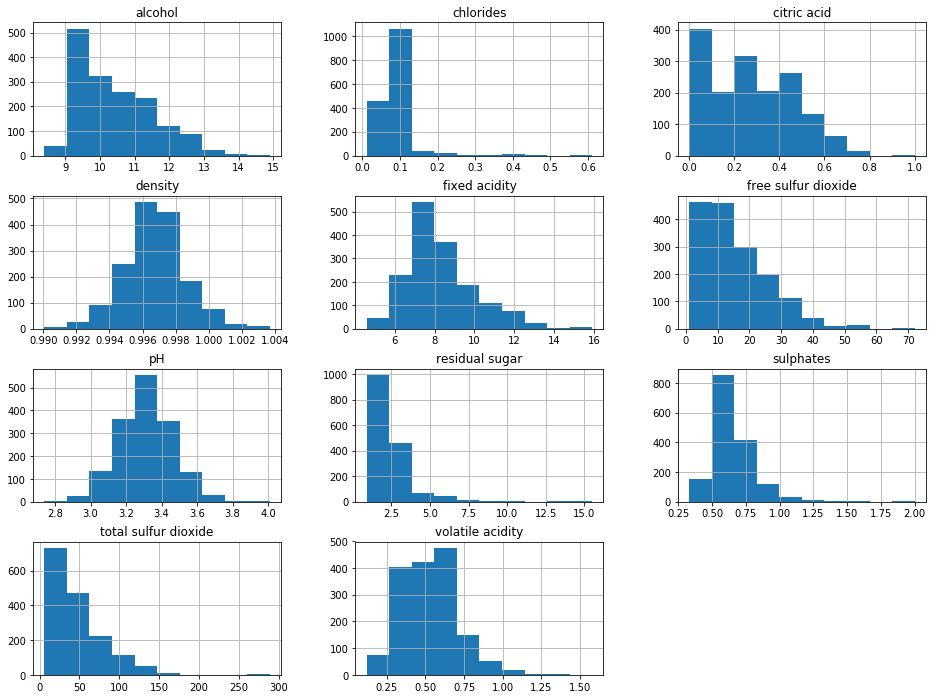

In [12]:
# Histograms for each attribute
attributeOnly.hist()
pyplot.show()

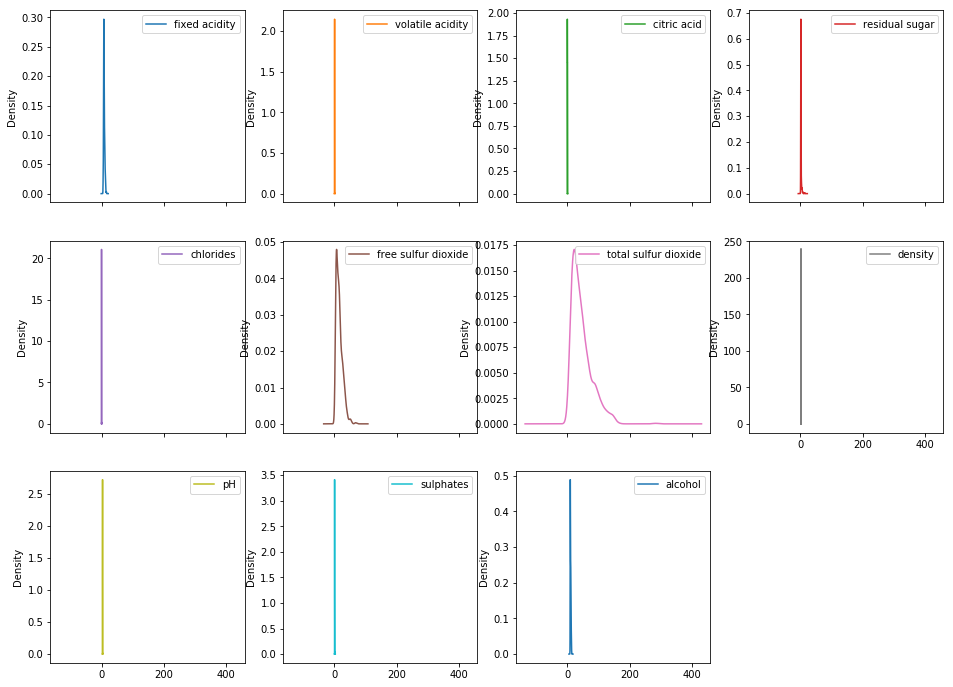

In [13]:
# Density plot for each attribute
attributeOnly.plot(kind='density', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

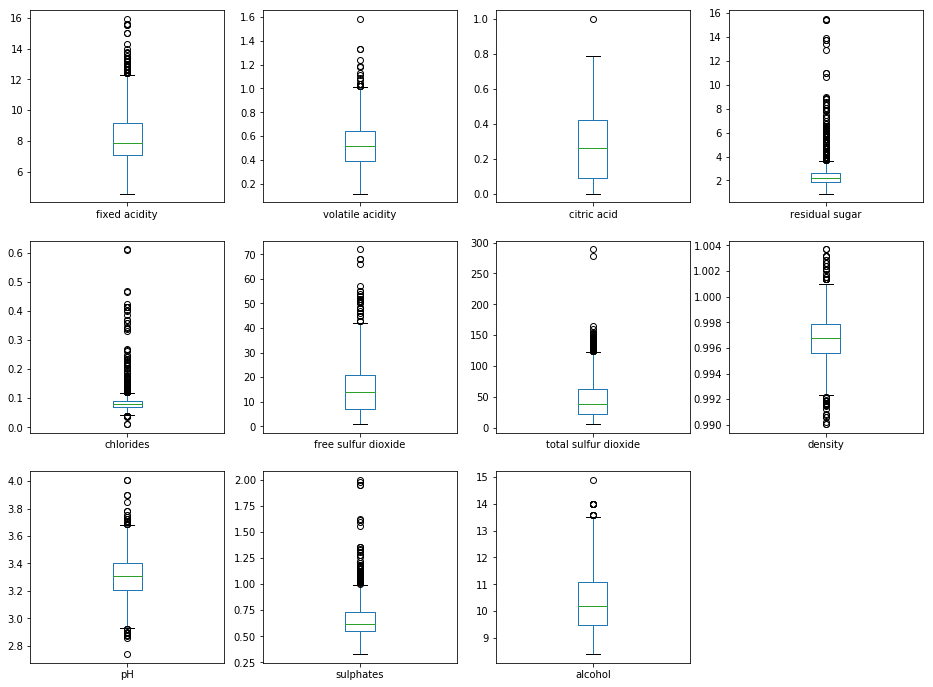

In [14]:
# Box and Whisker plot for each attribute
attributeOnly.plot(kind='box', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

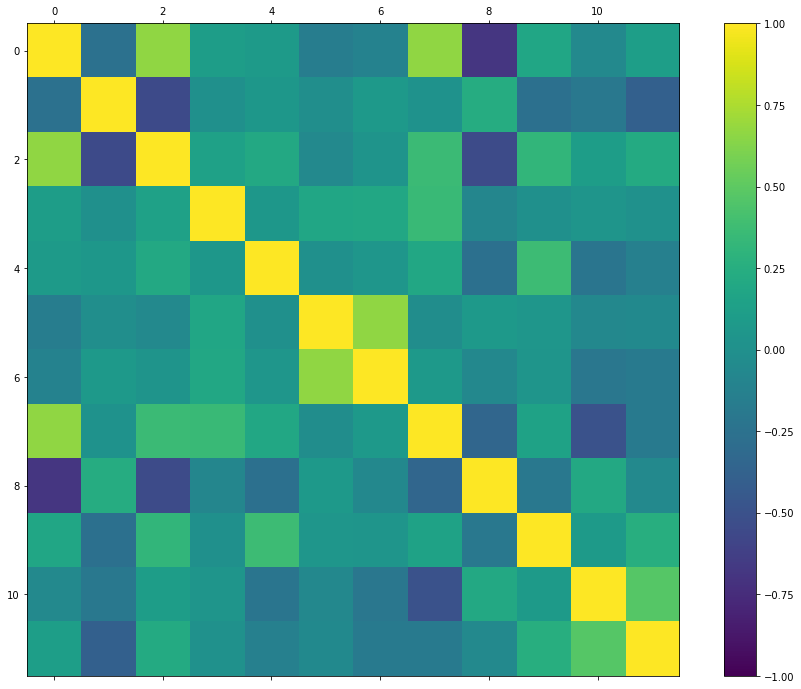

In [15]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

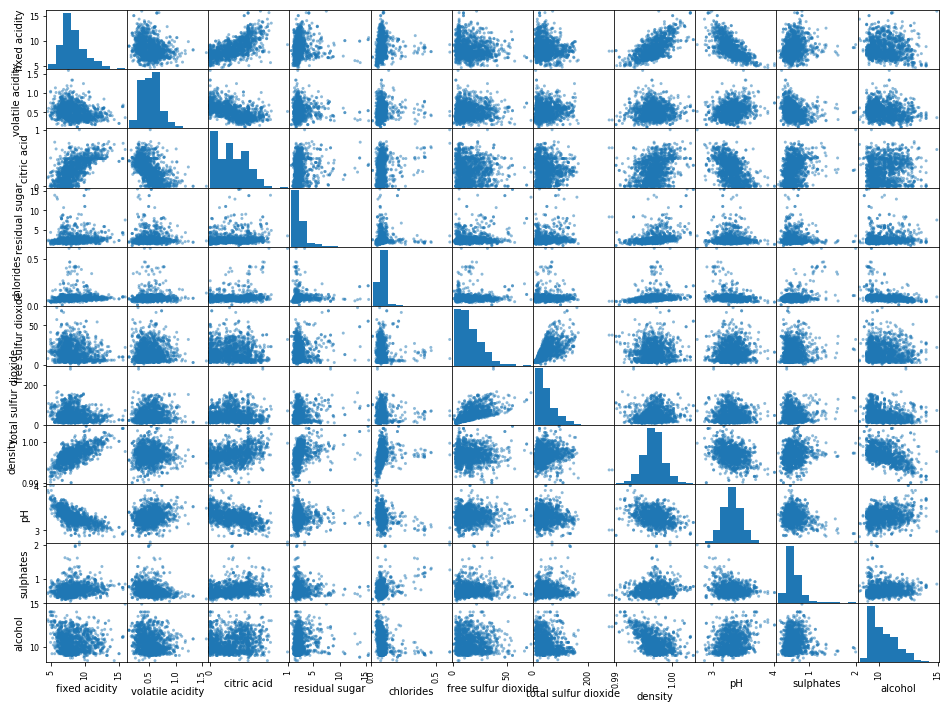

In [16]:
# Scatterplot matrix
scatter_matrix(attributeOnly)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [17]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [18]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [19]:
# Not applicable for this iteration of the project.

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [20]:
seedNum = 888
array = entireDataset.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.30
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (1599, 11) Y_entire.shape: (1599,)
X_train.shape: (1119, 11) Y_train.shape: (1119,)
X_validation.shape: (480, 11) Y_validation.shape: (480,)
Total time for data handling and visualization: 0:00:09.917468


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate four linear, three non-linear, and four ensemble algorithms:

Linear Algorithms: Linear Regression, Ridge Regression, LASSO Regression, and Elastic Net Regression

Non-Linear Algorithms: Decision Trees (CART), k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [21]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [22]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LinearRegression()))
models.append(('RR', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('CART', DecisionTreeRegressor(random_state=seedNum)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(random_state=seedNum)))
models.append(('ET', ExtraTreesRegressor(random_state=seedNum)))
models.append(('AB', AdaBoostRegressor(random_state=seedNum)))
models.append(('GBM', GradientBoostingRegressor(random_state=seedNum)))
results = []
names = []
metrics = []

In [23]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics (RMSE) from all models:',numpy.mean(metrics))

LR: -0.441533 (0.059412)
Model training time: 0:00:00.058891
RR: -0.440319 (0.057204)
Model training time: 0:00:00.027948
LASSO: -0.643766 (0.076852)
Model training time: 0:00:00.017466
EN: -0.643268 (0.078614)
Model training time: 0:00:00.016470
CART: -0.660352 (0.083367)
Model training time: 0:00:00.094825
KNN: -0.629363 (0.073460)
Model training time: 0:00:00.035933
SVM: -0.544220 (0.076752)
Model training time: 0:00:00.920288
RF: -0.390563 (0.047439)
Model training time: 0:00:00.442695
ET: -0.383189 (0.061414)
Model training time: 0:00:00.317891
AB: -0.412015 (0.044562)
Model training time: 0:00:01.050563
GBM: -0.415702 (0.049575)
Model training time: 0:00:00.638313
Average metrics (RMSE) from all models: -0.5094810101526215


### 4.b) Spot-checking baseline algorithms

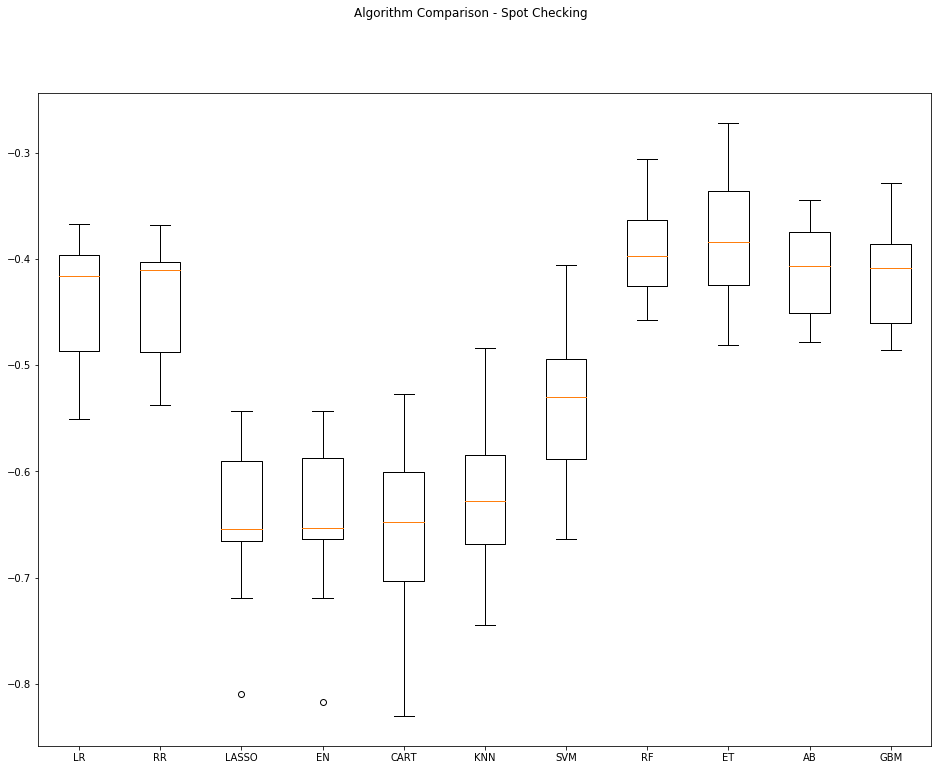

In [24]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [25]:
# Set up the comparison array
results = []
names = []

In [26]:
# Tuning algorithm #1 - AdaBoost
startTimeModule = datetime.now()
paramGrid1 = dict(n_estimators=numpy.array([25,50,100,200,300]))
model1 = AdaBoostRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: -0.412049 using {'n_estimators': 50}
-0.420814 (0.038645) with: {'n_estimators': 25}
-0.412049 (0.044568) with: {'n_estimators': 50}
-0.415999 (0.043049) with: {'n_estimators': 100}
-0.417781 (0.047387) with: {'n_estimators': 200}
-0.417193 (0.047729) with: {'n_estimators': 300}
Model training time: 0:00:11.956759


In [27]:
# Tuning algorithm #2 - Random Forest
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=numpy.array([100,150,200,250,300]))
model2 = RandomForestRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: -0.358127 using {'n_estimators': 200}
-0.359790 (0.037915) with: {'n_estimators': 100}
-0.358787 (0.038163) with: {'n_estimators': 150}
-0.358127 (0.040145) with: {'n_estimators': 200}
-0.358588 (0.039795) with: {'n_estimators': 250}
-0.358259 (0.039896) with: {'n_estimators': 300}
Model training time: 0:00:46.450185


In [28]:
# Tuning algorithm #3 - Extra Trees
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=numpy.array([100,150,200,250,300]))
model3 = ExtraTreesRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('ET')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: -0.345315 using {'n_estimators': 200}
-0.347635 (0.045025) with: {'n_estimators': 100}
-0.345634 (0.046062) with: {'n_estimators': 150}
-0.345315 (0.046881) with: {'n_estimators': 200}
-0.346015 (0.046787) with: {'n_estimators': 250}
-0.346307 (0.045864) with: {'n_estimators': 300}
Model training time: 0:00:27.969477


In [29]:
# Tuning algorithm #4 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=numpy.array([100,150,200,250,300]))
model4 = GradientBoostingRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: -0.413792 using {'n_estimators': 250}
-0.415753 (0.049569) with: {'n_estimators': 100}
-0.416906 (0.055033) with: {'n_estimators': 150}
-0.414798 (0.059900) with: {'n_estimators': 200}
-0.413792 (0.060860) with: {'n_estimators': 250}
-0.413899 (0.065360) with: {'n_estimators': 300}
Model training time: 0:00:06.748433


### 5.b) Compare Algorithms After Tuning

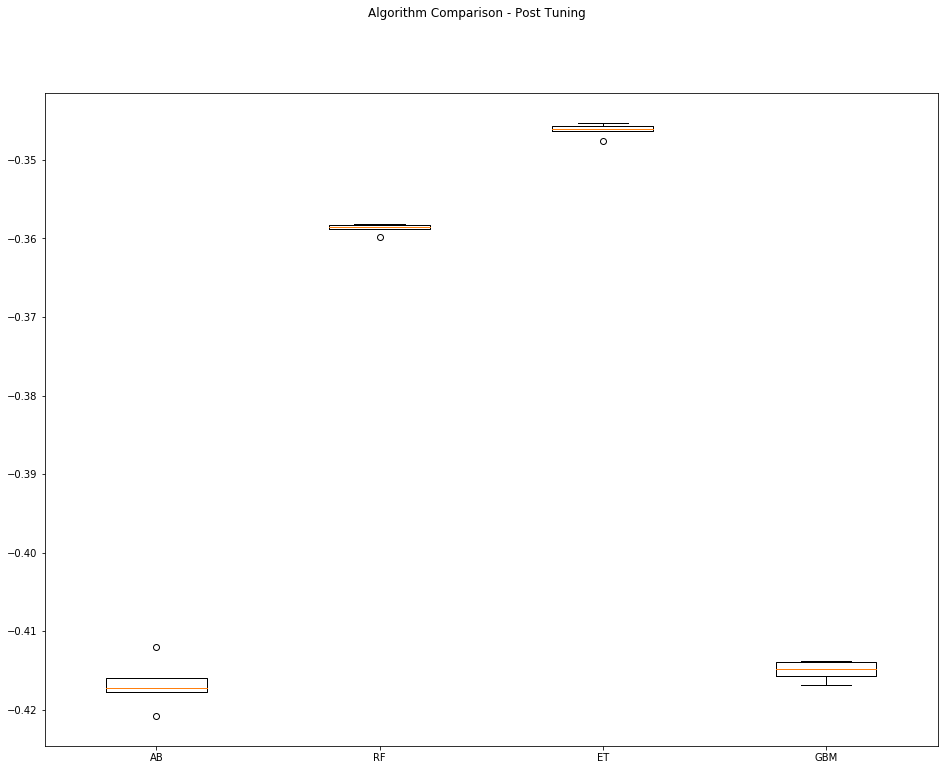

In [30]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [31]:
model = ExtraTreesRegressor(n_estimators=200, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))

0.30889734375000005


### 6.b) Create standalone model on entire training dataset

In [32]:
startTimeModule = datetime.now()
finalModel = ExtraTreesRegressor(n_estimators=200)
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00.669274


### 6.c) Save model for later use

In [33]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:01:48.487711
